(parameters)=

# Plot Parameters

This notebook shows an example on how to import and plot some parameters of the SLSN population. First, lets import the necessary functions.

In [1]:
from slsne.utils import get_params

If you want to get all the parameters and metadata of a single supernova, you can read them in like such:

In [16]:
params = get_params('2018ibb')

for key in params.meta:
    print(key, params.meta[key])

Name 2018ibb
RA_deg 69.737292
DEC_deg -20.66225
Redshift 0.166
Method Host_lines
EBV 0.0275
Explosion 58327.36
Peak 58459.42
Quality Gold
Survey ZTF


Note that the values for `Explosion` and `Peak` found in the reference data might differ slightly from the mean of the `MJD0` and `Peak_MJD` columns. The former as kept constant for reference through the codebase, and the latter are the most up to date values derived from the latest fits.

Users can also use the `get_params` function to get the values for either a single parameter, or a list of parameters.

In [6]:
# Import the parameters
x_param, y_param = 'Pspin','mejecta'
params = get_params(param_names = [x_param, y_param])

# The output will be a table with the mean value, lower 1-sigma, and upper 1-sigma values for each parameter
print(params[0])

Pspin_med Pspin_up Pspin_lo mejecta_med mejecta_up mejecta_lo
--------- -------- -------- ----------- ---------- ----------
  3.61332  4.60652  2.26994      2.4408     4.4225    0.92677


Now we can plot the results.

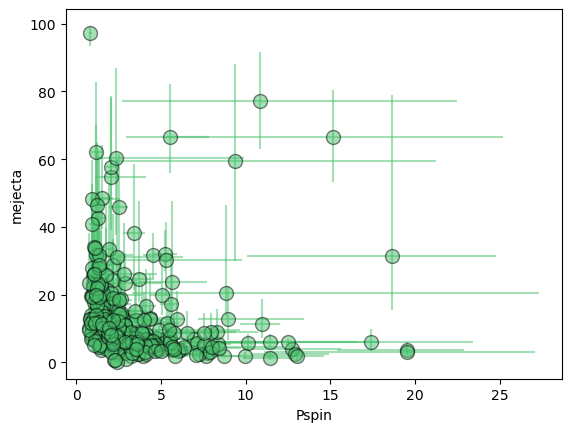

In [9]:
import matplotlib.pyplot as plt
# Import colorblind friendly green
from slsne.utils import cb_g

# Plot individual light curves shaded.
plt.errorbar(params[f'{x_param}_med'], params[f'{y_param}_med'], xerr = [params[f'{x_param}_lo'], params[f'{x_param}_up']],
             yerr = [params[f'{y_param}_lo'], params[f'{y_param}_up']], fmt = 'o', color = cb_g, markersize = 10, alpha = 0.5,
             markeredgecolor = 'k', zorder = 300 )
plt.xlabel(x_param)
plt.ylabel(y_param)
plt.show();

Alternatively, you can use the built in plotting function, which will save the plot directly and use the saved formatted names and recommended limits.

In [10]:
from slsne.plots import make_plot
make_plot('Pspin', 'mejecta')